### **Задание**

*   **Группа:** ИУ5-22М
*   **Вариант:** 7
*   **Задачи по варианту:**
    *   Задача №7: Устранение пропусков для числового признака с использованием метода заполнения **медианой**.
    *   Задача №27: Обнаружение и **замена** выбросов (на основе 5% и 95% квантилей) для числового признака.
*   **Дополнительное требование для группы ИУ5-22М:** Построить **гистограмму** для произвольной колонки данных.
*   **Набор данных:** Я выберу набор данных "Pima Indians Diabetes Database" с Kaggle. Он хорошо подходит, так как содержит числовые признаки, и в нем есть значения (0), которые по смыслу являются пропусками, что делает задачу более реалистичной.

---

### **Отчет по рубежному контролю №1**

*   **Ф.И.О.:** *Козлов Егор*
*   **Группа:** ИУ5-22М
*   **Вариант:** 7

### **Шаг 1: Подготовка и загрузка данных**

Сначала установим необходимые библиотеки, загрузим данные с Kaggle и посмотрим на их общую структуру. Для использования Kaggle API в Colab вам потребуется загрузить свой файл `kaggle.json`.



In [2]:
# Установка Kaggle API
!pip install kaggle

# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Создание директории и загрузка kaggle.json
# На этом шаге Colab попросит вас загрузить файл с вашего компьютера
from google.colab import files
print('Пожалуйста, загрузите ваш файл kaggle.json')
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Загрузка датасета Pima Indians Diabetes
!kaggle datasets download -d uciml/pima-indians-diabetes-database

# Распаковка архива
!unzip pima-indians-diabetes-database.zip

Пожалуйста, загрузите ваш файл kaggle.json


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 24.4MB/s]
Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


In [3]:
# Загрузка данных в DataFrame
df = pd.read_csv('diabetes.csv')

# Вывод первых 5 строк для ознакомления
print("Первые 5 строк датасета:")
print(df.head())

Первые 5 строк датасета:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# Просмотр общей информации и типов данных
print("\nОбщая информация о датасете:")
df.info()


Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Шаг 2: Предварительная обработка данных

In [5]:
# Список колонок, где 0 означает пропуск
cols_with_zeros_as_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Замена 0 на NaN
for col in cols_with_zeros_as_nan:
    df[col] = df[col].replace(0, np.nan)

# Проверим количество пропусков после замены
print("Количество пропусков в каждом столбце:")
print(df.isnull().sum())

Количество пропусков в каждом столбце:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## Задача №7: Устранение пропусков методом заполнения медианой

In [6]:
# Посмотрим на количество пропусков в столбце 'Insulin' до обработки
print(f"Количество пропусков в 'Insulin' до заполнения: {df['Insulin'].isnull().sum()}")

# Вычисляем медиану для столбца 'Insulin'
median_insulin = df['Insulin'].median()
print(f"Медиана для столбца 'Insulin': {median_insulin}")

# Заполняем пропуски медианным значением
df['Insulin'].fillna(median_insulin, inplace=True)

# Проверяем, что пропуски были заполнены
print(f"Количество пропусков в 'Insulin' после заполнения: {df['Insulin'].isnull().sum()}")

Количество пропусков в 'Insulin' до заполнения: 374
Медиана для столбца 'Insulin': 125.0
Количество пропусков в 'Insulin' после заполнения: 0


<ipython-input-6-b596d1290561>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Insulin'].fillna(median_insulin, inplace=True)


## Задача №27: Обнаружение и замена выбросов на основе 5% и 95% квантилей

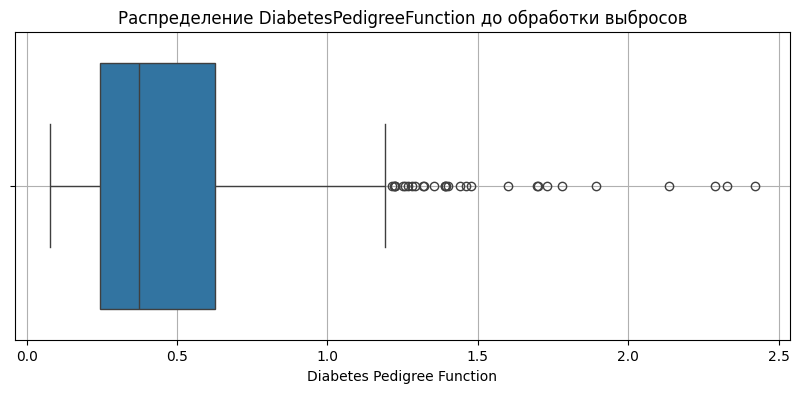

Нижняя граница (5% квантиль): 0.1404
Верхняя граница (95% квантиль): 1.1328


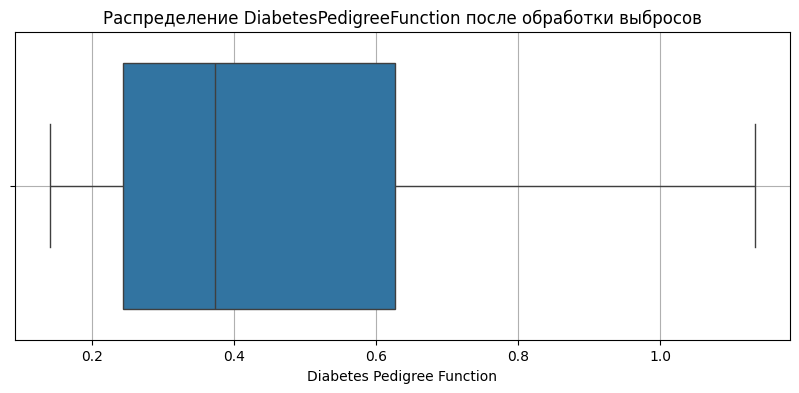


Статистическое описание столбца после замены выбросов:
count    768.000000
mean       0.457207
std        0.276766
min        0.140350
25%        0.243750
50%        0.372500
75%        0.626250
max        1.132850
Name: DiabetesPedigreeFunction, dtype: float64


In [7]:
# Визуализируем распределение до обработки выбросов с помощью "ящика с усами"
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.title('Распределение DiabetesPedigreeFunction до обработки выбросов')
plt.xlabel('Diabetes Pedigree Function')
plt.grid(True)
plt.show()

# Рассчитываем 5% и 95% квантили
lower_bound = df['DiabetesPedigreeFunction'].quantile(0.05)
upper_bound = df['DiabetesPedigreeFunction'].quantile(0.95)

print(f"Нижняя граница (5% квантиль): {lower_bound:.4f}")
print(f"Верхняя граница (95% квантиль): {upper_bound:.4f}")

# Заменяем выбросы
# Значения, которые меньше нижней границы, заменяем на нижнюю границу
df['DiabetesPedigreeFunction'] = np.where(
    df['DiabetesPedigreeFunction'] < lower_bound,
    lower_bound,
    df['DiabetesPedigreeFunction']
)
# Значения, которые больше верхней границы, заменяем на верхнюю границу
df['DiabetesPedigreeFunction'] = np.where(
    df['DiabetesPedigreeFunction'] > upper_bound,
    upper_bound,
    df['DiabetesPedigreeFunction']
)


# Визуализируем распределение после обработки выбросов
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.title('Распределение DiabetesPedigreeFunction после обработки выбросов')
plt.xlabel('Diabetes Pedigree Function')
plt.grid(True)
plt.show()

print("\nСтатистическое описание столбца после замены выбросов:")
print(df['DiabetesPedigreeFunction'].describe())

##  Дополнительное задание для группы ИУ5-22М: Построение гистограммы

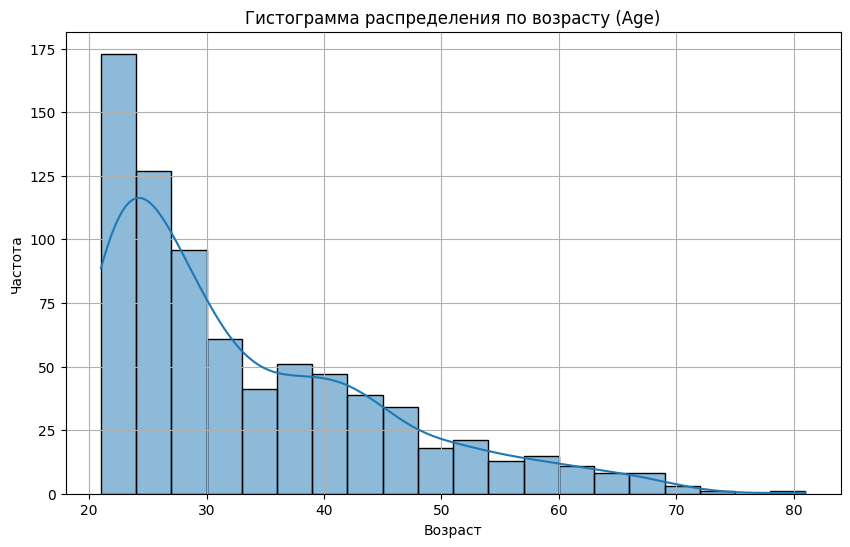

In [8]:
# Построение гистограммы для столбца 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True) # kde=True добавляет сглаживающую кривую

# Добавление заголовков и меток
plt.title('Гистограмма распределения по возрасту (Age)')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(True)
plt.show()